In [ ]:
!pip install transformers

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


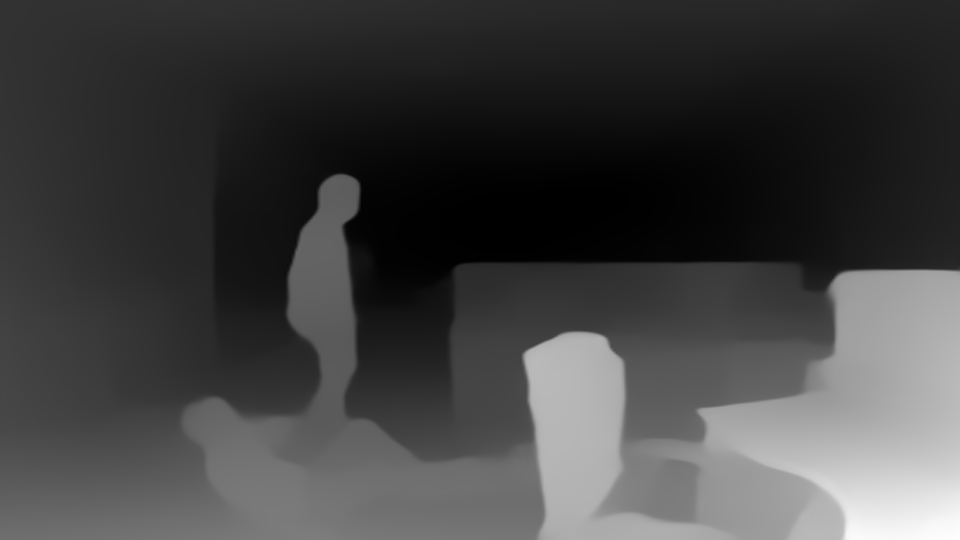

In [ ]:
# Import necessary libraries
from transformers import pipeline
from PIL import Image
from IPython.display import display

# Create a pipeline for depth estimation using the specified model
estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

# Path to the image in the Colab environment
image_path = "/content/20231107T183A093A36-443981_MI_Ward_Cam_4.jpg"

# Load the image directly from the local filesystem
image = Image.open(image_path)

# Get the result from the estimator
result = estimator(images=image)

# Display the depth map image
display(result["depth"])


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


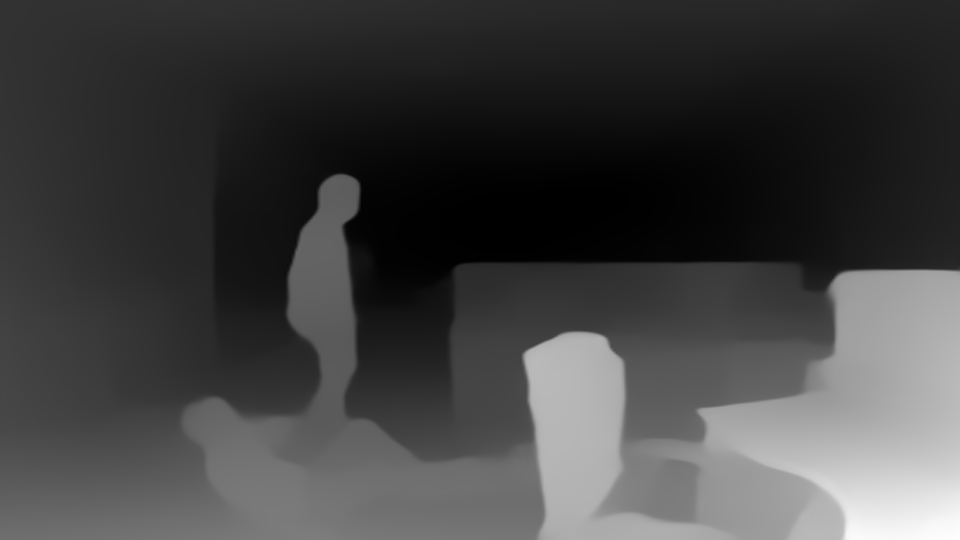

In [ ]:
# Import necessary libraries
from transformers import pipeline
from PIL import Image
from IPython.display import display

# Create a pipeline for depth estimation using the specified model
estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

# Path to the image in the Colab environment
image_path = "/content/20231107T183A093A36-443981_MI_Ward_Cam_4.jpg"

# Load the image directly from the local filesystem
image = Image.open(image_path)

# Get the result from the estimator
result = estimator(images=image)

# Display the depth map image
display(result["depth"])


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


Depth at pixel (100, 100): 43


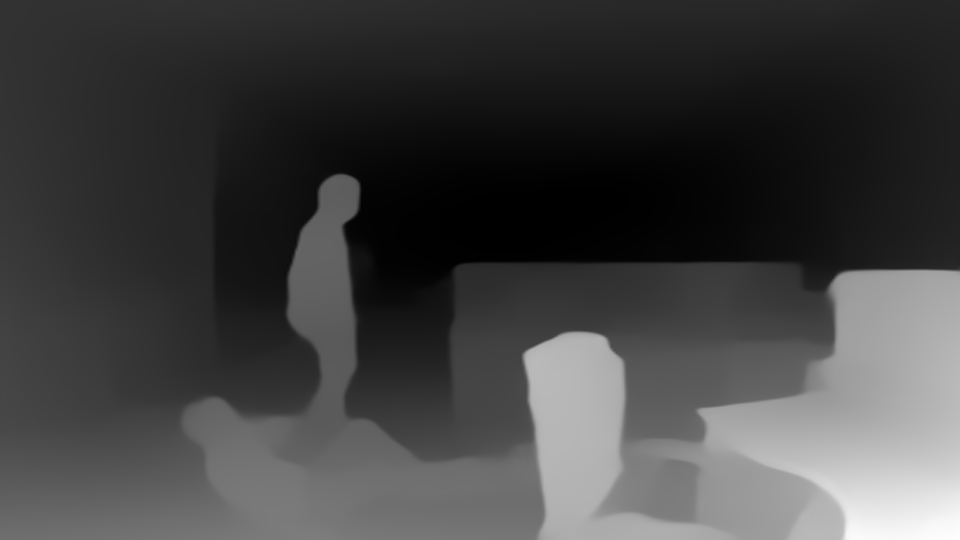

In [ ]:
from transformers import pipeline
from PIL import Image
from IPython.display import display
import numpy as np

# Create a pipeline for depth estimation
estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

# Load the image
image_path = "/content/20231107T183A093A36-443981_MI_Ward_Cam_4.jpg"
image = Image.open(image_path)

# Get the result from the estimator
result = estimator(images=image)

# The depth image (PIL Image)
depth_image = result["depth"]

# Convert the depth image to a numpy array for analysis
depth_array = np.array(depth_image)

# Example: Extract depth value at a specific pixel
x, y = 100, 100  # Pixel coordinates
depth_value = depth_array[y, x]
print("Depth at pixel (100, 100):", depth_value)

# Display the depth map image
display(depth_image)


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


Depth at pixel (100, 100): 43


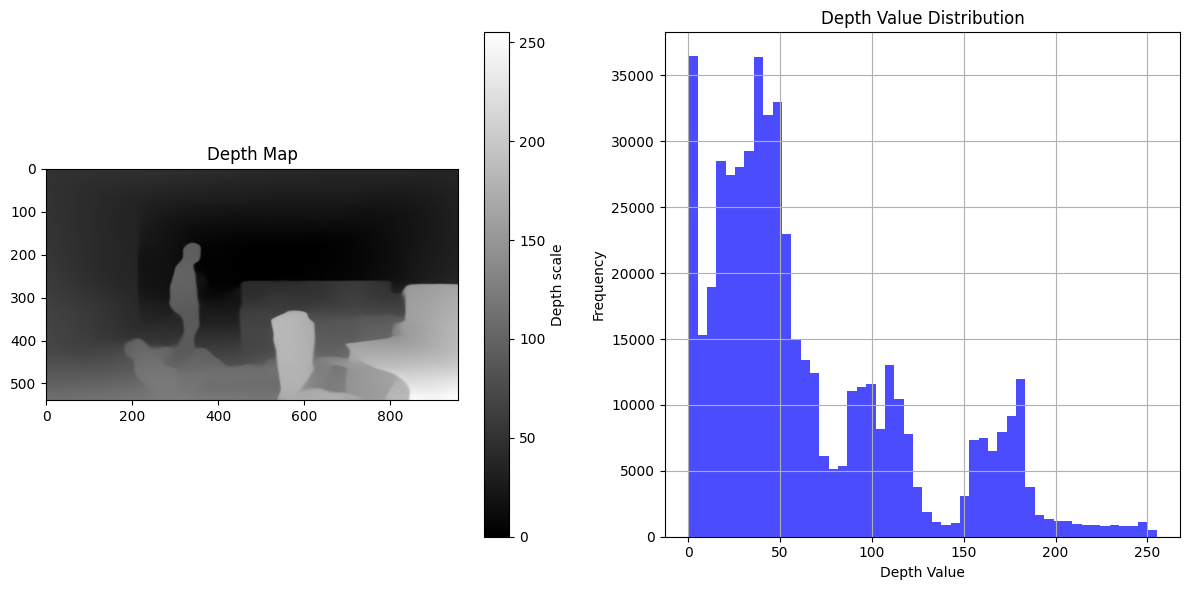

In [ ]:
import matplotlib.pyplot as plt

# Create a pipeline for depth estimation
estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

# Load the image
image_path = "/content/20231107T183A093A36-443981_MI_Ward_Cam_4.jpg"
image = Image.open(image_path)

# Get the result from the estimator
result = estimator(images=image)

# The depth image (PIL Image)
depth_image = result["depth"]

# Convert the depth image to a numpy array for analysis
depth_array = np.array(depth_image)

# Example: Extract depth value at a specific pixel
x, y = 100, 100  # Pixel coordinates
depth_value = depth_array[y, x]
print("Depth at pixel (100, 100):", depth_value)

# Display the depth map image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Depth Map")
plt.imshow(depth_image, cmap='gray')
plt.colorbar(label='Depth scale')

# Plot histogram of the depth values
plt.subplot(1, 2, 2)
plt.title("Depth Value Distribution")
plt.hist(depth_array.flatten(), bins=50, color='blue', alpha=0.7)
plt.xlabel("Depth Value")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


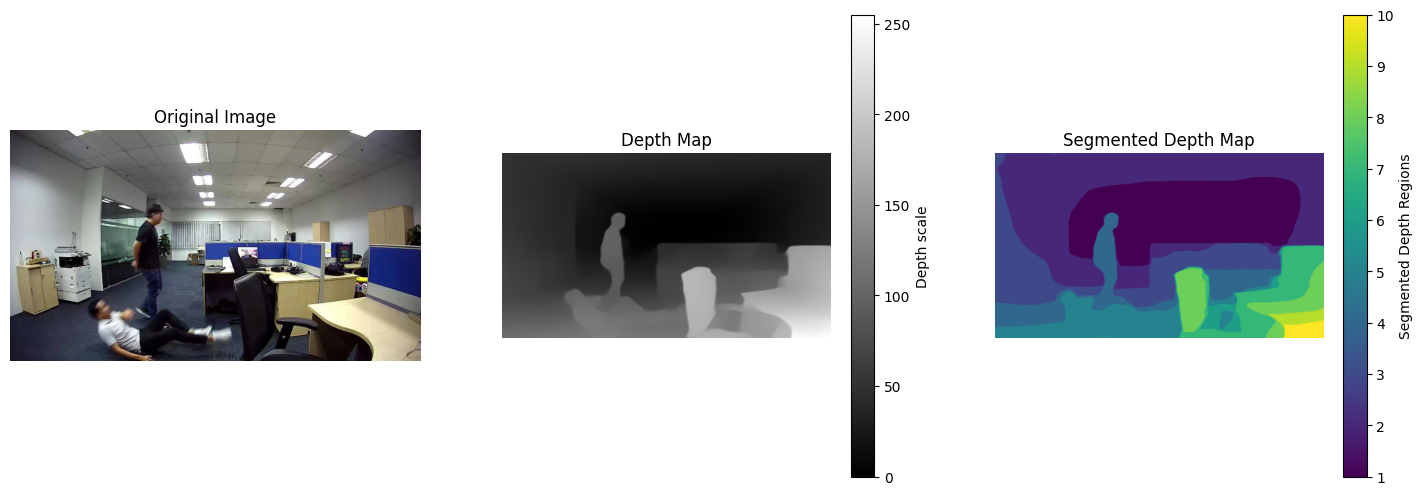

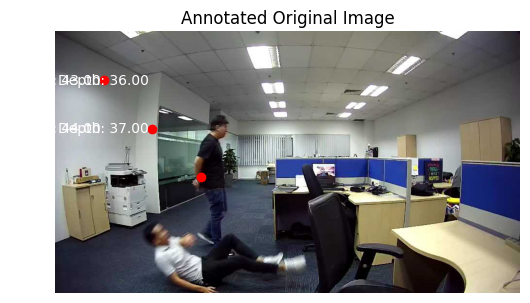

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a pipeline for depth estimation
estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

# Load the image
image_path = "/content/20231107T183A093A36-443981_MI_Ward_Cam_4.jpg"
image = Image.open(image_path)

# Get the result from the estimator
result = estimator(images=image)

# The depth image (PIL Image)
depth_image = result["depth"]

# Convert the depth image to a numpy array for analysis
depth_array = np.array(depth_image)

# Define depth thresholds for segmentation (example thresholds)
# thresholds = [50, 100, 150, 200]  # Modify as needed based on your specific depth scale
thresholds = [25, 50, 75, 100, 125, 150, 175, 200, 225]  # Modify as needed based on your specific depth scale

# Create a segmented map based on these thresholds
segmented_map = np.digitize(depth_array, bins=thresholds)

# Plotting
plt.figure(figsize=(18, 6))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Display the depth map image
plt.subplot(1, 3, 2)
plt.imshow(depth_image, cmap='gray')
plt.colorbar(label='Depth scale')
plt.title("Depth Map")
plt.axis('off')

# Display the segmented depth map
plt.subplot(1, 3, 3)
plt.imshow(segmented_map, cmap='viridis')
plt.colorbar(label='Segmented Depth Regions', ticks=range(len(thresholds)+1))
plt.title("Segmented Depth Map")
plt.axis('off')

# Annotate depth values on the original image
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)
ax.scatter([100, 200, 300], [100, 200, 300], color='red')  # Example points
for (j, i), label in np.ndenumerate(segmented_map[100:300:100, 100:300:100]):
    ax.text(i*100, j*100+100, f'Depth: {depth_array[j*100+100, i*100+100]:.2f}',
            color='white', ha='center', va='center')
plt.title("Annotated Original Image")
plt.axis('off')
plt.show()


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


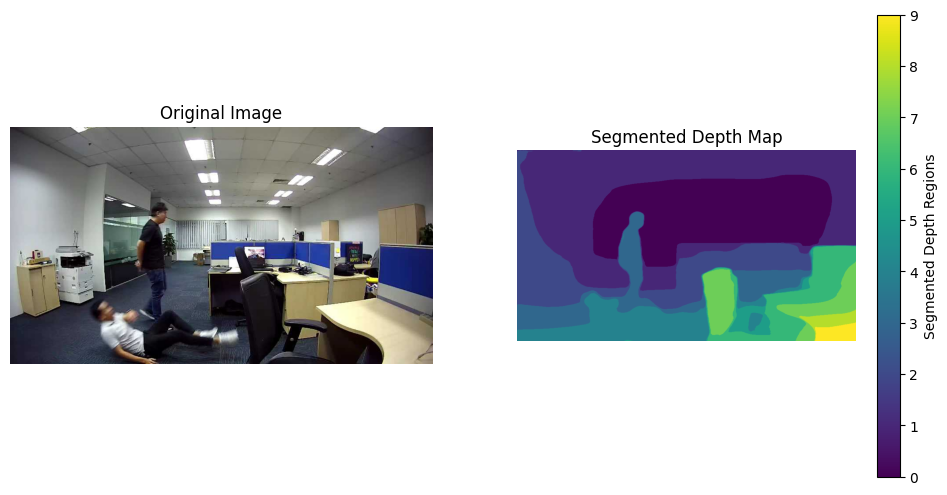

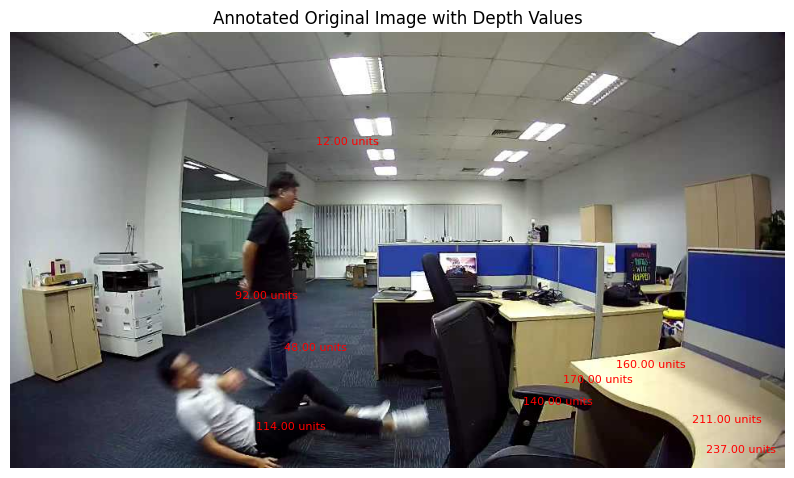

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from transformers import pipeline
from PIL import Image

# Create a pipeline for depth estimation
estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

# Load the image
image_path = "/content/20231107T183A093A36-443981_MI_Ward_Cam_4.jpg"
image = Image.open(image_path)

# Get the result from the estimator
result = estimator(images=image)

# The depth image (PIL Image)
depth_image = result["depth"]

# Convert the depth image to a numpy array for analysis
depth_array = np.array(depth_image)

# Define depth thresholds for segmentation (example thresholds)
thresholds = [25, 50, 75, 100, 125, 150, 175, 200, 225]  # Modify as needed based on your specific depth scale

# Create a segmented map based on these thresholds
segmented_map = np.digitize(depth_array, bins=thresholds)

# Plotting
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Display the segmented depth map
plt.subplot(1, 2, 2)
plt.imshow(segmented_map, cmap='viridis')
plt.colorbar(label='Segmented Depth Regions', ticks=range(len(thresholds)+1))
plt.title("Segmented Depth Map")
plt.axis('off')
plt.show()

# Find centroids of segmented regions
properties = measure.regionprops(segmented_map)
centroids = [(int(prop.centroid[0]), int(prop.centroid[1])) for prop in properties]

# Annotate depth values on the original image at centroids
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)
for centroid in centroids:
    y, x = centroid
    if 0 <= x < depth_array.shape[1] and 0 <= y < depth_array.shape[0]:
        depth_value = depth_array[y, x]
        ax.text(x, y, f'{depth_value:.2f} units', color='red', ha='center', va='center', fontsize=8)
plt.title("Annotated Original Image with Depth Values")
plt.axis('off')
plt.show()


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


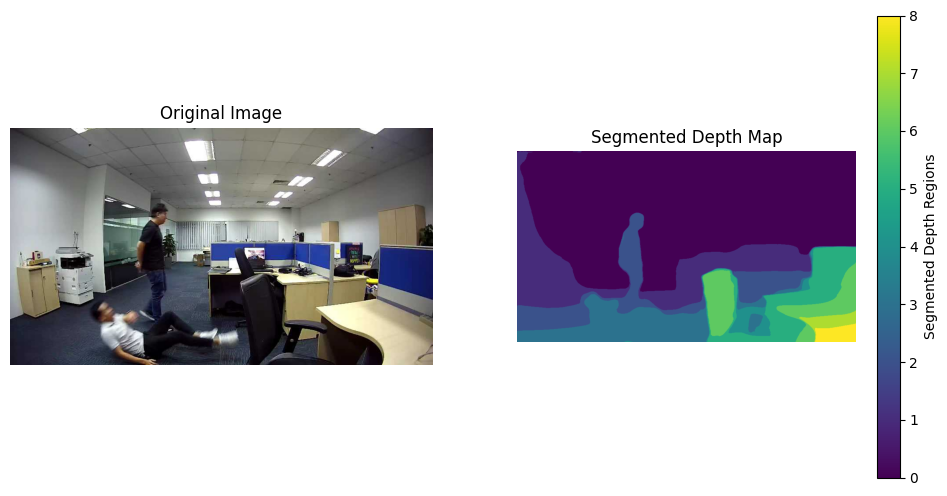

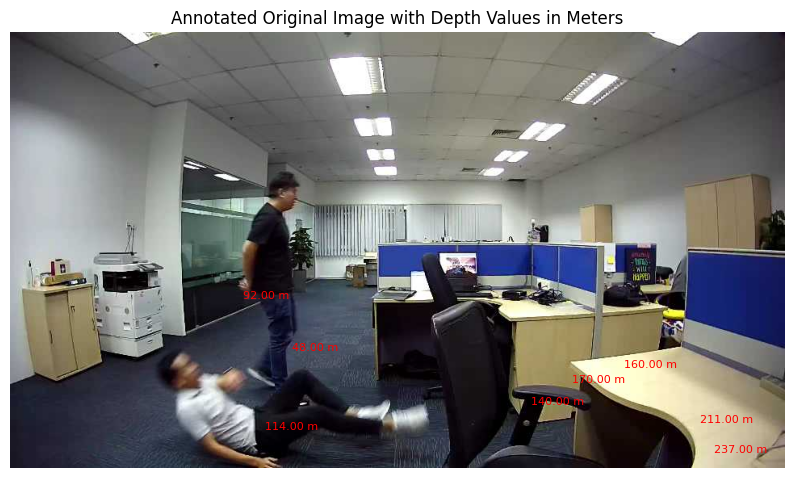

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from transformers import pipeline
from PIL import Image

# Create a pipeline for depth estimation
estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

# Load the image
image_path = "/content/20231107T183A093A36-443981_MI_Ward_Cam_4.jpg"
image = Image.open(image_path)

# Get the result from the estimator
result = estimator(images=image)

# The depth image (PIL Image)
depth_image = result["depth"]

# Convert the depth image to a numpy array for analysis
depth_array = np.array(depth_image)

# Define depth thresholds for segmentation (example thresholds)
thresholds = [50, 75, 100, 125, 150, 175, 200, 225]  # Modify as needed based on your specific depth scale

# Create a segmented map based on these thresholds
segmented_map = np.digitize(depth_array, bins=thresholds)

# Plotting
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Display the segmented depth map
plt.subplot(1, 2, 2)
plt.imshow(segmented_map, cmap='viridis')
plt.colorbar(label='Segmented Depth Regions', ticks=range(len(thresholds)+1))
plt.title("Segmented Depth Map")
plt.axis('off')
plt.show()

# Find centroids of segmented regions
properties = measure.regionprops(segmented_map)
centroids = [(int(prop.centroid[0]), int(prop.centroid[1])) for prop in properties]

# Annotate depth values on the original image at centroids
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)
for centroid in centroids:
    y, x = centroid
    if 0 <= x < depth_array.shape[1] and 0 <= y < depth_array.shape[0]:
        depth_value = depth_array[y, x]
        ax.text(x, y, f'{depth_value:.2f} m', color='red', ha='center', va='center', fontsize=8)
plt.title("Annotated Original Image with Depth Values in Meters")
plt.axis('off')
plt.show()


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


255


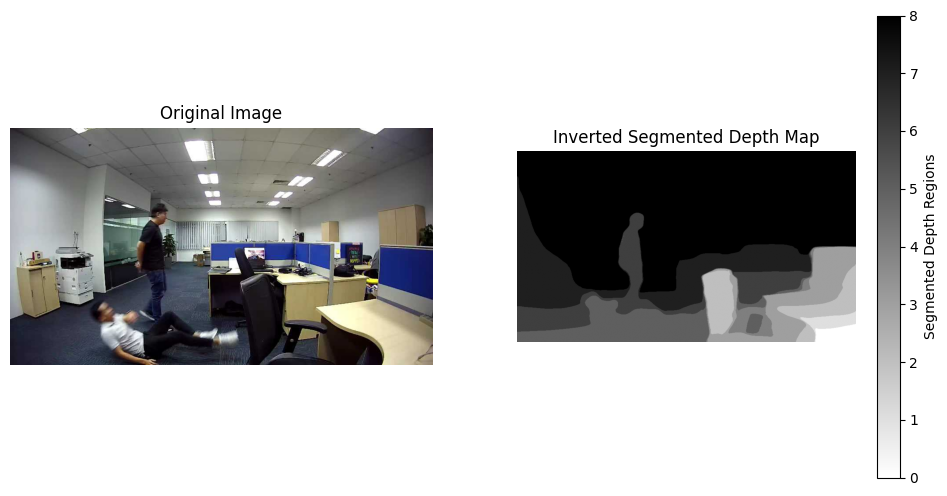

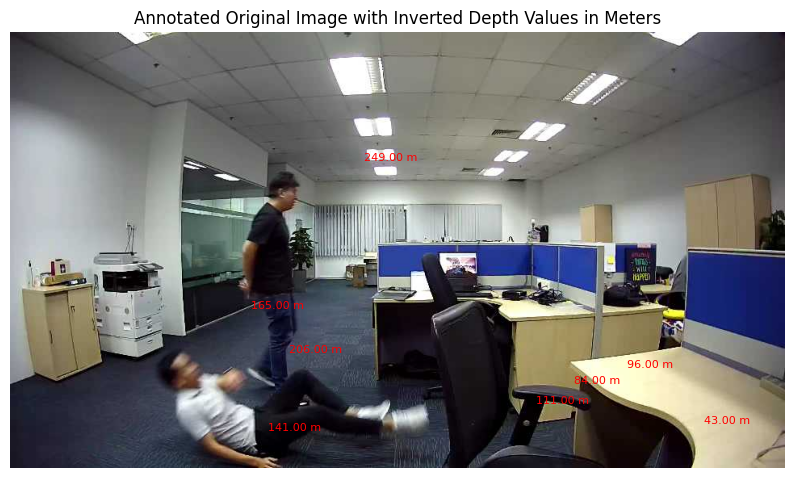

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from transformers import pipeline
from PIL import Image

# Create a pipeline for depth estimation
estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

# Load the image
image_path = "/content/20231107T183A093A36-443981_MI_Ward_Cam_4.jpg"
image = Image.open(image_path)

# Get the result from the estimator
result = estimator(images=image)

# The depth image (PIL Image)
depth_image = result["depth"]

# Convert the depth image to a numpy array for analysis and invert the depth values
depth_array = np.array(depth_image)
max_depth = depth_array.max()
print(max_depth)
inverted_depth_array = max_depth - depth_array  # Invert the depth values

# Define depth thresholds for segmentation (example thresholds for inverted scale)
thresholds = [max_depth - 225, max_depth - 200, max_depth - 175, max_depth - 150, max_depth - 125, max_depth - 100, max_depth - 75, max_depth - 50]

# Create a segmented map based on these inverted thresholds
segmented_map = np.digitize(inverted_depth_array, bins=thresholds)

# Plotting
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Display the segmented depth map
plt.subplot(1, 2, 2)
plt.imshow(segmented_map, cmap='binary')
plt.colorbar(label='Segmented Depth Regions', ticks=range(len(thresholds)+1))
plt.title("Inverted Segmented Depth Map")
plt.axis('off')
plt.show()

# Find centroids of segmented regions
properties = measure.regionprops(segmented_map)
centroids = [(int(prop.centroid[0]), int(prop.centroid[1])) for prop in properties]

# Annotate inverted depth values on the original image at centroids
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)
for centroid in centroids:
    y, x = centroid
    if 0 <= x < inverted_depth_array.shape[1] and 0 <= y < inverted_depth_array.shape[0]:
        depth_value = inverted_depth_array[y, x]
        ax.text(x, y, f'{depth_value:.2f} m', color='red', ha='center', va='center', fontsize=8)
plt.title("Annotated Original Image with Inverted Depth Values in Meters")
plt.axis('off')
plt.show()


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


Maximum depth value: 255


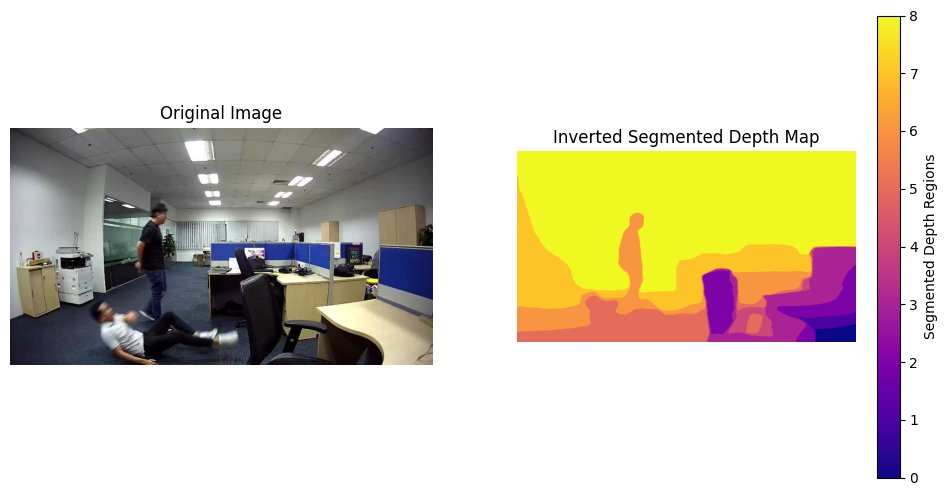

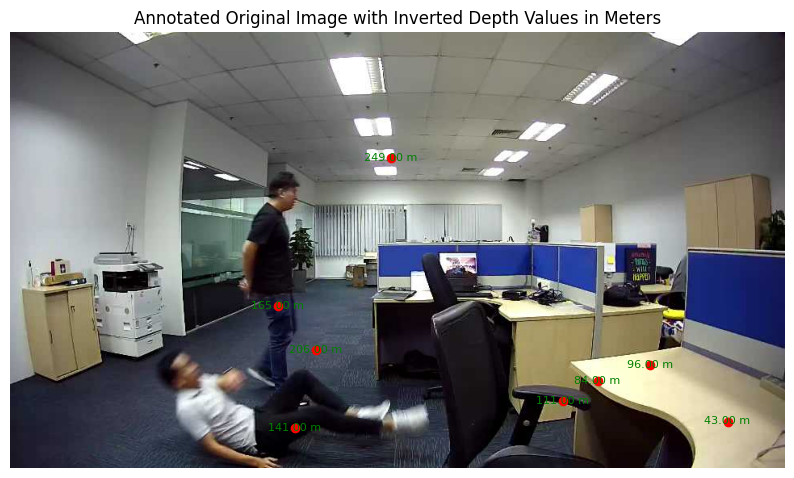

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from transformers import pipeline
from PIL import Image

# Create a pipeline for depth estimation
estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

# Load the image
image_path = "/content/20231107T183A093A36-443981_MI_Ward_Cam_4.jpg"
image = Image.open(image_path)

# Get the result from the estimator
result = estimator(images=image)

# The depth image (PIL Image)
depth_image = result["depth"]

# Convert the depth image to a numpy array for analysis and invert the depth values
depth_array = np.array(depth_image)
max_depth = depth_array.max()
print("Maximum depth value:", max_depth)
inverted_depth_array = max_depth - depth_array  # Invert the depth values

# Define depth thresholds for segmentation (example thresholds for inverted scale)
thresholds = [max_depth - 225, max_depth - 200, max_depth - 175, max_depth - 150, max_depth - 125, max_depth - 100, max_depth - 75, max_depth - 50]

# Create a segmented map based on these inverted thresholds
segmented_map = np.digitize(inverted_depth_array, bins=thresholds)

# Plotting
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Display the segmented depth map
plt.subplot(1, 2, 2)
plt.imshow(segmented_map, cmap='plasma')
plt.colorbar(label='Segmented Depth Regions', ticks=range(len(thresholds)+1))
plt.title("Inverted Segmented Depth Map")
plt.axis('off')
plt.show()

# Find centroids of segmented regions
properties = measure.regionprops(segmented_map)
centroids = [(int(prop.centroid[0]), int(prop.centroid[1])) for prop in properties]

# Annotate inverted depth values on the original image at centroids
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)
# Draw centroids on the image
for prop in properties:
    y0, x0 = prop.centroid
    ax.plot(x0, y0, 'ro')
for centroid in centroids:
    y, x = centroid
    if 0 <= x < inverted_depth_array.shape[1] and 0 <= y < inverted_depth_array.shape[0]:
        depth_value = inverted_depth_array[y, x]
        ax.text(x, y, f'{depth_value:.2f} m', color='green', ha='center', va='center', fontsize=8)
plt.title("Annotated Original Image with Inverted Depth Values in Meters")
plt.axis('off')
plt.show()
